# Question 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


**Loading the Iris dataset and marking data and target**



```



In [0]:
iris = load_iris()
X = iris.data
y = iris.target

**Splitting dataset into train and test**

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
shufflesplit = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.25)

**Converting target to categorical variable using number of classes**

In [0]:
import keras
from keras import utils as np_utils

num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**1. Adding two hidden layers. Assuming that first layer where we add input nodes is connected to a hidden layer with number of nodes given by hidden_size**

**2. Adding parameter grid with three parameters to tube: epochs and sizes of two hidden layers**

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras import regularizers


def make_model(optimizer="adam", hidden_size= 32, hidden_size2 = 32,alpha =0.01):
    model = Sequential()
    model.add(Dense(hidden_size, activation='relu', input_dim = 4,kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dense(hidden_size2, activation='relu',kernel_regularizer=regularizers.l2(alpha)))
#     model.add(Dense(hidden_size2, activation='relu',kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256], 'hidden_size2': [32, 64, 256], 'alpha':[0.01, 0.001]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=shufflesplit)






#[Dense(32, input_shape = (150,)), Activation('relu'),Dense(3),Activaion('softmax')]

**Fitting the model on the training set**

In [0]:
grid.fit(X_train, y_train)

Epoch 1/5
84/84 [==============================] - 9s 109ms/step - loss: 1.4689 - acc: 0.5952
Epoch 2/5
84/84 [==============================] - 0s 212us/step - loss: 1.3742 - acc: 0.6667
Epoch 3/5
84/84 [==============================] - 0s 205us/step - loss: 1.3018 - acc: 0.6667
Epoch 4/5
84/84 [==============================] - 0s 204us/step - loss: 1.2593 - acc: 0.7024
Epoch 5/5
84/84 [==============================] - 0s 190us/step
Epoch 1/5
84/84 [==============================] - 10s 113ms/step - loss: 1.5377 - acc: 0.3214
Epoch 2/5
84/84 [==============================] - 0s 199us/step - loss: 1.4102 - acc: 0.5000
Epoch 3/5
84/84 [==============================] - 0s 190us/step - loss: 1.3434 - acc: 0.6667
Epoch 4/5
84/84 [==============================] - 0s 206us/step - loss: 1.2903 - acc: 0.6667
Epoch 5/5
84/84 [==============================] - 0s 206us/step
Epoch 1/5
84/84 [==============================] - 10s 115ms/step - loss: 1.9013 - acc: 0.3333
Epoch 2/5
84/84 [=====

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7feacf855a20>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epochs': [5, 10], 'hidden_size': [32, 64, 256], 'hidden_size2': [32, 64, 256], 'alpha': [0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**Identifying best parametes of the grid and printing out their values**

In [0]:
grid.best_params_

{'alpha': 0.001, 'epochs': 10, 'hidden_size': 64, 'hidden_size2': 256}

**Creating a new model using best parameters of the grid**

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = 4,kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#     model.add(Dense(hidden_size2, activation='relu',kernel_regularizer=regularizers.l2(alpha)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=['accuracy'])



**Fitting the new model created on the training dataset**

In [0]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
112/112 [==============================] - 13s 119ms/step - loss: 1.1289 - acc: 0.3661
Epoch 2/10
112/112 [==============================] - 0s 232us/step - loss: 0.9085 - acc: 0.6696
Epoch 3/10
112/112 [==============================] - 0s 231us/step - loss: 0.7892 - acc: 0.6786
Epoch 4/10
112/112 [==============================] - 0s 218us/step - loss: 0.7010 - acc: 0.8750
Epoch 5/10
112/112 [==============================] - 0s 229us/step - loss: 0.6215 - acc: 0.9375
Epoch 6/10
112/112 [==============================] - 0s 223us/step - loss: 0.5741 - acc: 0.7500
Epoch 7/10
112/112 [==============================] - 0s 229us/step - loss: 0.5286 - acc: 0.8036
Epoch 8/10
112/112 [==============================] - 0s 241us/step - loss: 0.4899 - acc: 0.9554
Epoch 9/10
112/112 [==============================] - 0s 227us/step - loss: 0.4624 - acc: 0.9643
Epoch 10/10
112/112 [==============================] - 0s 242us/step - loss: 0.4373 - acc: 0.9286


In [0]:
model.evaluate(X_test,y_test)

38/38 [==============================] - 0s 451us/step


[0.40274334894983393, 0.9473684210526315]

In [0]:
print(model.metrics_names)

['loss', 'acc']


**Final accuracy on the test set is 94% and loss is at 0.40**

Text(0, 0.5, 'loss')

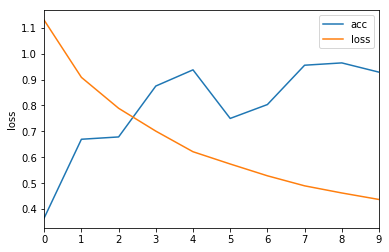

In [0]:
df = pd.DataFrame(history.history)
df[['acc', 'loss']].plot()
plt.ylabel("accuracy")
plt.ylabel("loss")

**Graph indicating loss vs accuracy for every epoch during training**